## Analysis Problems

**Which airlines and routes (for example "PDX-SFO") are most affected by flight delays, and what impact does wind have on departure delays?**

---

### Steps:

1. **Load Data**
   - Load the two CSV files into separate DataFrames.
   - Explore the data and create any new columns that might benefit your analysis.

2. **Routes Analysis**
   - For routes, calculate the average departure delays and highest number of canceled flights.
   - Store this as a DataFrame called `routes_delays_cancels`, resetting the index after calculating.

3. **Airlines Analysis**
   - For airlines, determine the average departure delays and the highest number of canceled flights.
   - Store this as a DataFrame called `airlines_delays_cancels`, resetting the index after calculating.

4. **Visualization**
   - Produce two bar graphs:
     1. The top 9 highest number of cancellations by route in a plot called `top9_route_cancels_bar`.
     2. The top 9 highest average departure delays by airline in a plot called `top9_airline_delays_bar`.

5. **Wind Analysis**
   - Determine if 10 mile per hour wind gusts or more have a larger average departure delay for both SEA and PDX,
     - Set `wind_response` to `True` if so, and `False` if not.

In [7]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# 1. Loading and manipulating data
flights2022 = pd.read_csv('flights2022.csv')
flights_weather2022 = pd.read_csv('flights_weather2022.csv')

In [11]:
# Initial Data Exploration (based on your notebook content) - Optional, but good practice
flights2022.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


In [17]:
print("Unique airlines:")
flights2022['airline'].unique()

Unique airlines:


array(['United Air Lines Inc.', 'Alaska Airlines Inc.', 'JetBlue Airways',
       'American Airlines Inc.', 'Horizon Air', 'Southwest Airlines Co.',
       'Delta Air Lines Inc.', 'SkyWest Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Spirit Air Lines',
       'Frontier Airlines Inc.', 'Allegiant Air'], dtype=object)

In [19]:
print("Number of unique airlines:")
len(flights2022['airline'].unique())

Number of unique airlines:


12

In [21]:
print("Number of rows and columns:")
flights2022.shape

Number of rows and columns:


(111376, 20)

In [31]:
flights2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111376 entries, 0 to 111375
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111376 non-null  int64  
 1   month           111376 non-null  int64  
 2   day             111376 non-null  int64  
 3   dep_time        108931 non-null  float64
 4   sched_dep_time  111376 non-null  int64  
 5   dep_delay       108931 non-null  float64
 6   arr_time        108834 non-null  float64
 7   sched_arr_time  111376 non-null  int64  
 8   arr_delay       108697 non-null  float64
 9   carrier         111376 non-null  object 
 10  flight          111376 non-null  int64  
 11  tailnum         111247 non-null  object 
 12  origin          111376 non-null  object 
 13  dest            111376 non-null  object 
 14  air_time        108697 non-null  float64
 15  distance        111376 non-null  int64  
 16  hour            111376 non-null  int64  
 17  minute    

In [23]:
flights_weather2022.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [27]:
print("flights_weather2022 columns:")
print(flights_weather2022.columns)

print("\nflights_weather2022 shape:")
print(flights_weather2022.shape)

flights_weather2022 columns:
Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'airline', 'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib'],
      dtype='object')

flights_weather2022 shape:
(111006, 29)


In [29]:
flights_weather2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111006 non-null  int64  
 1   month           111006 non-null  int64  
 2   day             111006 non-null  int64  
 3   dep_time        108566 non-null  float64
 4   sched_dep_time  111006 non-null  int64  
 5   dep_delay       108566 non-null  float64
 6   arr_time        108469 non-null  float64
 7   sched_arr_time  111006 non-null  int64  
 8   arr_delay       108332 non-null  float64
 9   carrier         111006 non-null  object 
 10  flight          111006 non-null  int64  
 11  tailnum         110877 non-null  object 
 12  origin          111006 non-null  object 
 13  dest            111006 non-null  object 
 14  air_time        108332 non-null  float64
 15  distance        111006 non-null  int64  
 16  hour            111006 non-null  int64  
 17  minute    

In [35]:
print("flights_weather2022 unique routes:")
flights_weather2022['route'].unique()

flights_weather2022 unique routes:


array(['SEA-IAH', 'SEA-FAI', 'SEA-ATL', 'SEA-ORD', 'PDX-ORD', 'PDX-JFK',
       'SEA-MIA', 'SEA-PSC', 'SEA-IAD', 'SEA-DEN', 'PDX-PHX', 'PDX-MDW',
       'SEA-OAK', 'PDX-DFW', 'SEA-PHX', 'SEA-LAS', 'PDX-SLC', 'SEA-PDX',
       'PDX-SJC', 'SEA-CLT', 'PDX-ATL', 'PDX-DEN', 'SEA-SNA', 'SEA-DTW',
       'PDX-OAK', 'SEA-LAX', 'PDX-SEA', 'PDX-LAS', 'PDX-SAN', 'PDX-SFO',
       'PDX-MSP', 'SEA-ONT', 'PDX-ANC', 'SEA-SFO', 'SEA-PSP', 'PDX-HNL',
       'PDX-SNA', 'SEA-ICT', 'SEA-MSO', 'PDX-KOA', 'PDX-LAX', 'SEA-STS',
       'PDX-BOS', 'SEA-ANC', 'SEA-JFK', 'SEA-SJC', 'SEA-SLC', 'SEA-BOI',
       'SEA-BOS', 'SEA-CMH', 'SEA-DFW', 'SEA-HNL', 'SEA-OKC', 'SEA-MSP',
       'SEA-SBA', 'PDX-SMF', 'SEA-DAL', 'SEA-TUS', 'SEA-SAN', 'SEA-PHL',
       'SEA-KOA', 'PDX-GEG', 'SEA-FLL', 'SEA-AUS', 'SEA-OGG', 'PDX-LIH',
       'PDX-OGG', 'SEA-BZN', 'PDX-ONT', 'PDX-BOI', 'SEA-RDU', 'SEA-RSW',
       'PDX-STL', 'SEA-DCA', 'SEA-MRY', 'SEA-GEG', 'SEA-SMF', 'SEA-MCO',
       'PDX-MCO', 'PDX-EWR', 'SEA-MFR', 'SEA-BLI', 

In [37]:
flights2022.duplicated().sum()

0

In [39]:
flights_weather2022.duplicated().sum()

0

In [41]:
# Create the route column
flights2022['route'] = flights2022['origin'] + '-' + flights2022['dest']

In [43]:
# Create a boolean column for cancelled flights
flights2022['is_cancelled'] = flights2022['dep_time'].isna()

In [45]:
flights2022.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'airline', 'route', 'is_cancelled'],
      dtype='object')

In [66]:
# Calculate mean departure delay and number of canceled flights for each unique flight route
routes_delays_cancels = flights2022.groupby('route').agg(
    mean_dep_delay=('dep_delay', 'mean'),
    total_cancellations=('is_cancelled', 'sum') # Use 'sum' on the boolean column
).reset_index()

# Identify routes with the highest mean departure delays
top_routes_by_delay = routes_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9)

# Identify routes with the highest number of cancellations
top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)

In [68]:
routes_delays_cancels.head()

,route,mean_dep_delay,total_cancellations
0,PDX-ABQ,1.098039,2
1,PDX-ANC,4.748936,4
2,PDX-ATL,7.020979,13
3,PDX-AUS,5.435374,5
4,PDX-BOI,5.136430,7


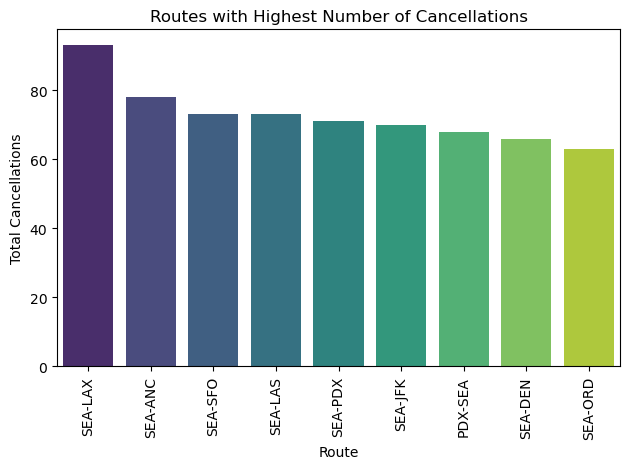

In [84]:
# Create a bar graph for highest number of cancellations
import seaborn as sns
sns.barplot(
    data=top_routes_by_cancellations,
    x="route",
    y="total_cancellations",
    order=top_routes_by_cancellations["route"],
    hue='route',
    palette="viridis",
)
plt.xlabel("Route")
plt.ylabel("Total Cancellations")
plt.title("Routes with Highest Number of Cancellations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [76]:
# Find mean departure delays and total cancellations by airline
airlines_delays_cancels = flights2022.groupby('airline').agg(
    mean_dep_delay=('dep_delay', 'mean'),
    total_cancellations=('is_cancelled', 'sum') # Use 'sum' on the boolean column
).reset_index()

# Identify airlines with the highest mean departure delay
top_airlines_by_delay = airlines_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9)

# Identify airlines with the highest number of cancellations
top_airlines_by_cancellations = airlines_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)

In [78]:
airlines_delays_cancels.head()

,airline,mean_dep_delay,total_cancellations
0,Alaska Airlines Inc.,6.739282,1300
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
3,Delta Air Lines Inc.,10.648634,383
4,Frontier Airlines Inc.,14.355856,12


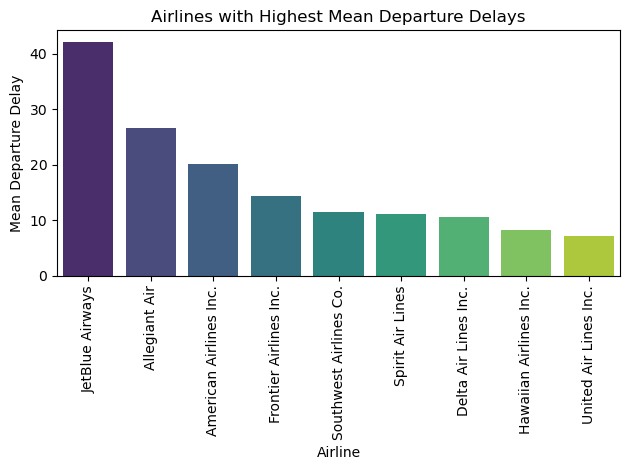

In [86]:
# Create a bar graph for highest mean depearture delay
sns.barplot(
    data=top_airlines_by_delay,
    x="airline",
    y="mean_dep_delay",
    order=top_airlines_by_delay["airline"],
    hue='airline',
    palette="viridis",
    dodge=False
)
plt.xlabel("Airline")
plt.ylabel("Mean Departure Delay")
plt.title("Airlines with Highest Mean Departure Delays")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [94]:
# Are departure delays impacted by 10+ mph winds from each airport
flights_weather2022["group"] = flights_weather2022["wind_gust"].apply(lambda x: ">= 10mph" if x >= 10 else "< 10 mph")

wind_grouped_data = flights_weather2022.groupby(["group", "origin"]).agg(
    mean_dep_delay=("dep_delay", "mean")
)

wind_response = True

In [96]:
wind_grouped_data.unstack()

mean_dep_delay          
origin              PDX       SEA
group                            
< 10 mph       6.686966  7.857595
>= 10mph       9.147024  9.231060